In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
from sklearn import metrics
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')


In [3]:
df = pd.read_csv('3state_model.csv')
df.head()

,Time,Jitter
0,1,0.000000
1,2,1.681319
2,3,2.982959
3,4,4.230621
4,5,5.399416


In [41]:
dfh_264 = pd.read_csv('h.264+mp3_TS.csv')
dfh_265 = pd.read_csv('h.265+mp3.csv')
print(len(dfh_264))
print(len(dfh_265))

4734
3838


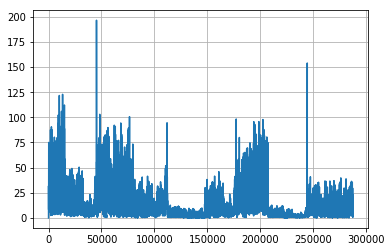

In [4]:
plt.plot(df['Jitter'])
plt.grid(True)

In [74]:
y = df['Jitter'].values
x = np.arange(1,len(y)+1)

In [44]:
y1 = dfh_264['Jitter'].values
x1 = np.arange(1,len(y1)+1)

y2 = dfh_265['Jitter'].values
x2 = np.arange(1,len(y2)+1)

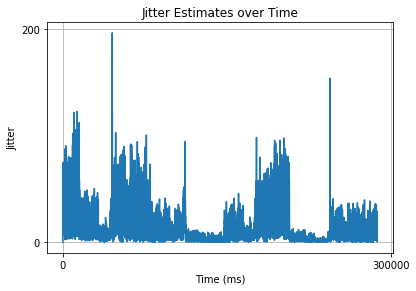

In [29]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],) # main axes

ax.plot(x, y)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Jitter')
ax.set_title('Jitter Estimates over Time')
#ax.set_xticks([0,100000,200000,300000])
#ax.set_xticklabels(['0','','','300000'])
ax.set_xticks([0,300000])
ax.set_xticklabels(['0','300000'])
ax.set_yticks([0,200])


#plt.show()
#fig.savefig('myimage.svg', format='svg', dpi=1200)

In [103]:
y1range = (0,800)

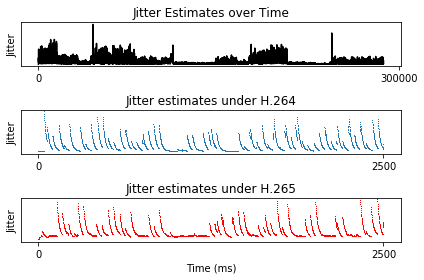

In [150]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)
ax3 = plt.subplot2grid((3,3), (2,0), colspan=3)

ax1.set_xticks([0,300000])
ax1.set_xticklabels(['0','300000'])
#ax1.set_yticks([0,600])
#ax1.set_yticklabels(['0','500'])
ax1.axes.yaxis.set_ticks([])

ax1.plot(x, y,'k')
ax1.set_ylabel('Jitter')

ax1.set_title('Jitter Estimates over Time')

ax2.set_xticks([0,2500])
ax2.set_xticklabels(['0','2500'])
ax2.set_yticks([0,600])
ax2.plot(x1[:2500], y1[:2500],',')
ax2.set_ylabel('Jitter')
#ax2.set_ylim(0,800)
ax2.axes.yaxis.set_ticks([])
ax2.set_title('Jitter estimates under H.264')

ax3.set_xticks([0,2500])
ax3.set_xticklabels(['0','2500'])
ax3.set_yticks([0,600])
ax3.plot(x2[:2500], y2[:2500], 'r,')
ax3.set_ylabel('Jitter')
ax3.axes.yaxis.set_ticks([])
ax3.set_title('Jitter estimates under H.265')
ax3.set_xlabel('Time (ms)')

fig.tight_layout()
fig.savefig('traces.pdf', format='pdf', dpi=2500)

In [313]:
dfh_265['Jitter'].max()

749.5566967

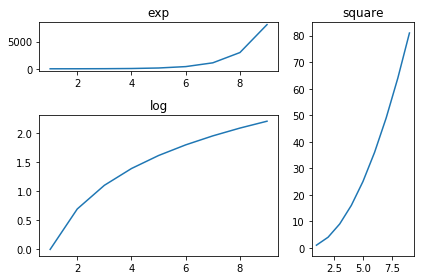

In [65]:
a1 = plt.subplot2grid((3,3),(0,0),colspan = 2)
a2 = plt.subplot2grid((3,3),(0,2), rowspan = 3)
a3 = plt.subplot2grid((3,3),(1,0),rowspan = 2, colspan = 2)
import numpy as np
x = np.arange(1,10)
a2.plot(x, x*x)
a2.set_title('square')
a1.plot(x, np.exp(x))
a1.set_title('exp')
a3.plot(x, np.log(x))
a3.set_title('log')
plt.tight_layout()
plt.show()

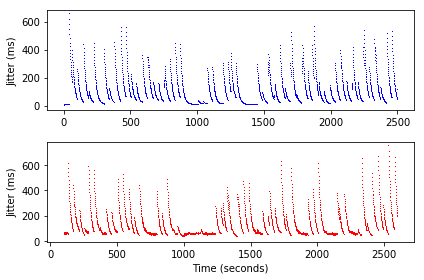

In [323]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,2), (1,0), colspan=3)

#ax1.set_title('H.264 and H.265 Jitter Estimates over Time')

#ax1.set_xticks([0,2500])
#ax1.set_xticklabels(['0','2500'])
#ax1.set_yticks([0,600])
ax1.plot(x1[:2500], y1[:2500], 'b,')
ax1.set_ylabel('Jitter (ms)')
#ax2.set_ylim(0,800)
#ax2.set_title('Jitter estimates under H.264')
#ax1.axes.yaxis.set_ticks([])

#ax2.set_xticks([0,2500])
#ax2.set_xticklabels(['0','2500'])
#ax2.set_yticks([0,800])
ax2.plot(x2[100:2600], y2[100:2600], 'r,')
ax2.set_ylabel('Jitter (ms)')
#ax2.set_title('Jitter estimates under H.265')
#ax2.axes.yaxis.set_ticks([])
ax2.set_xlabel('Time (seconds)')

fig.tight_layout()
fig.savefig('codec_extract.pdf', format='pdf', dpi=1200)

In [327]:
xr = dfh_264['Jitter'][:200].values

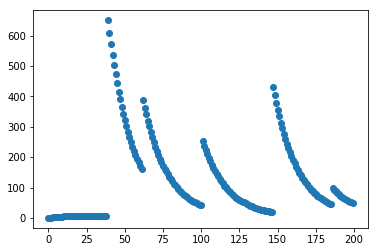

In [328]:
plt.plot(xr,'o')

In [387]:
N = len(xr)
t = np.linspace(0,100,N)

In [413]:
dxrdt = np.abs(np.diff(xr)/np.diff(t))
xcrit = 105

In [414]:
q = np.where(dxrdt > xcrit)
q

(array([ 38,  61, 100, 146, 185], dtype=int64),)

In [415]:
idx = [0] + list(q[0]+1) + [t.size]
idx

[0, 39, 62, 101, 147, 186, 200]

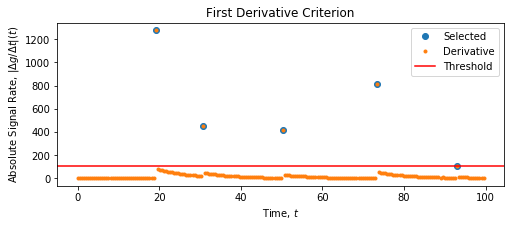

In [416]:
fig, axe = plt.subplots(figsize=(8,3))
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
#axe.grid()

In [199]:
from statsmodels import api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [395]:
j_acf = sm.tsa.acf(xr,nlags=200)

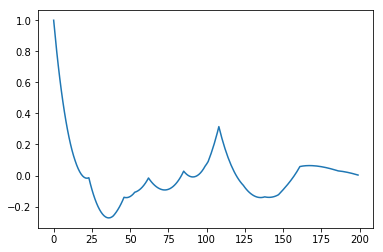

In [396]:
plt.plot(j_acf)

In [397]:
from scipy import signal, optimize
peaks, c = signal.find_peaks(j_acf, threshold=None)

In [398]:
peaks

array([ 23,  46,  62,  85, 108, 138, 167], dtype=int64)

[]

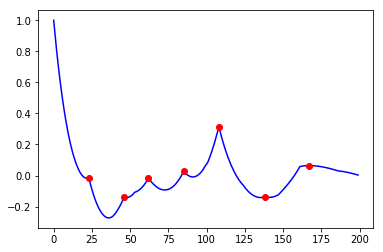

In [399]:
lag = np.arange(len(j_acf))
plt.plot(lag, j_acf,'b-')
plt.plot(lag[peaks], j_acf[peaks], 'ro')
plt.plot()

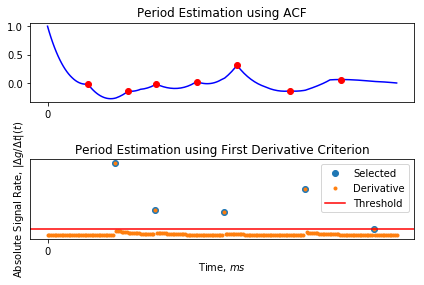

In [400]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,2), (1,0), colspan=3)

ax1.set_title('Period Estimation using ACF')

ax1.set_xticks([0,500])
ax1.set_xticklabels(['0','500'])
#ax1.set_yticks([0,600])
ax1.plot(lag, j_acf,'b-')
ax1.plot(lag[peaks], j_acf[peaks], 'ro')
#ax1.set_ylabel('Jitter')
#ax2.set_ylim(0,800)
#ax2.set_title('Jitter estimates under H.264')
#ax1.axes.yaxis.set_ticks([])

ax2.set_title('Period Estimation using First Derivative Criterion')
ax2.set_xticks([0,500])
ax2.set_xticklabels(['0','500'])

ax2.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
ax2.plot(t[:-1], dxrdt, '.', label='Derivative')
ax2.axhline(xcrit, color="red", label='Threshold')
ax2.set_xlabel("Time, $ms$")
ax2.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
ax2.legend(loc=0)

ax2.axes.yaxis.set_ticks([])


fig.tight_layout()
fig.savefig('period_estimation.pdf', format='pdf', dpi=1500)

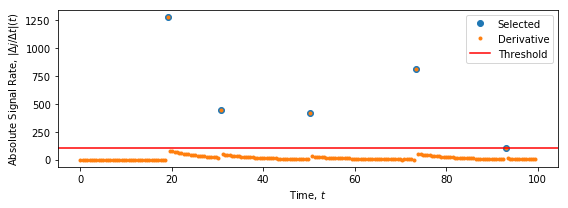

In [418]:
fig, axe = plt.subplots(figsize=(8,3))
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
#axe.set_title("Period Estimation using First Derivative Criterion")
#axe.set_xticks([0,500])
#axe.set_xticklabels(['0','500'])
axe.set_xlabel("Time, $t$")
#axe.axes.yaxis.set_ticks([])

axe.set_ylabel("Absolute Signal Rate, $|\Delta j/\Delta t|(t)$")
axe.legend()
fig.tight_layout()
fig.savefig('fd_period_estimation.pdf', format='pdf', dpi=2500);
#axe.grid()

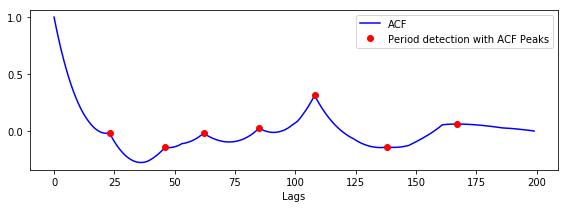

In [419]:
fig, axe = plt.subplots(figsize=(8,3))
axe.plot(lag, j_acf,'b-', label='ACF')
axe.plot(lag[peaks], j_acf[peaks], 'ro', label='Period detection with ACF Peaks')
#axe.set_title("Period Estimation using ACF")
axe.set_yticks([0.0, 0.5, 1.0])
#axe.set_yticks([0.0,1.0])
#axe.set_xticklabels(['0','500'])
axe.set_xlabel("Lags")
#axe.axes.xaxis.set_ticks([])


#axe.set_ylabel("ACF")
axe.legend()
fig.tight_layout()
fig.savefig('acf_period_estimation.pdf', format='pdf', dpi=2500);
#axe.grid()

In [256]:
def func(x,a,b):
    return a*np.exp(b*x)

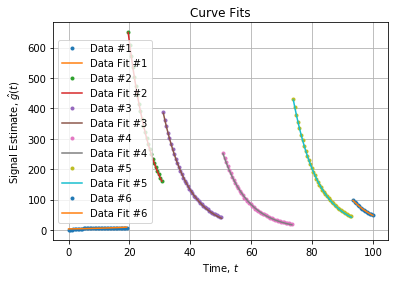

In [394]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], xr[i:j])
    axe.plot(t[i:j], xr[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [264]:
len(trials)

12

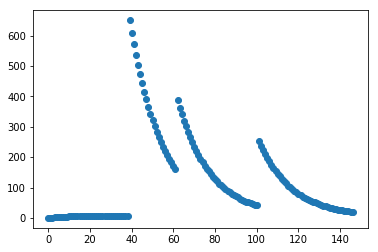

In [278]:
plt.plot(xr[:147], 'o')

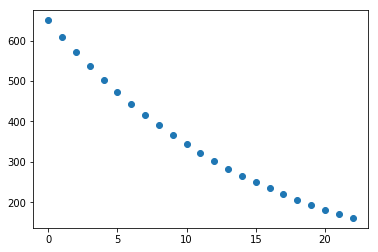

In [280]:
plt.plot(xr[39:62], 'o')

In [281]:
p

array([ 5.54354919e+02, -3.15476786e-01])

In [ ]:
axe.plot(t[i:j], func(t[i:j]-t[i], *p)

In [285]:
xx = t[39:62] - t[39]

In [286]:
yy = func(xx, trials[1]['a'],trials[1]['b'])

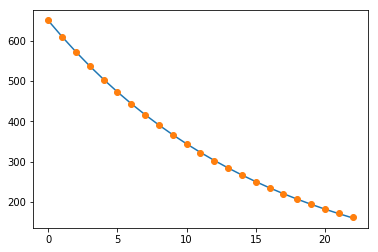

In [300]:
plt.plot(yy)
plt.plot(xr[39:62], 'o')

In [304]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(xr[39:62], yy))
print('MSE:', metrics.mean_squared_error(xr[39:62], yy))
print('RMSE:', np.sqrt(metrics.mean_squared_error(xr[39:62], yy)))

MAE: 0.358980598454922
MSE: 0.21128278323911773
RMSE: 0.4596550698503365


In [306]:
err = xr[39:62] - yy

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\envs\tsa_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


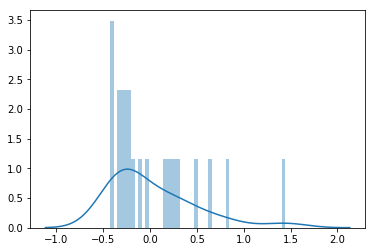

In [307]:
import seaborn as sns
sns.distplot((err),bins=50);

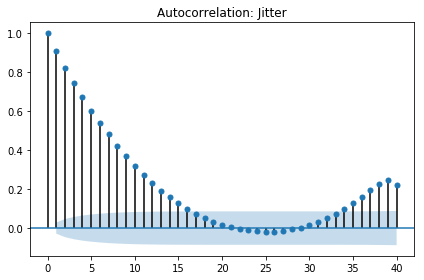

In [298]:
title = 'Autocorrelation: Jitter'
lags = 40
plot_acf(dfh_264['Jitter'],title=title,lags=lags)
plt.tight_layout()
plt.savefig('acf.pdf', format='pdf', dpi=1200);

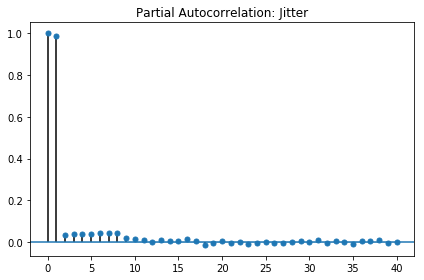

In [299]:
title = 'Partial Autocorrelation: Jitter'
lags = 40
plot_pacf(df['Jitter'],title=title,lags=lags)
plt.tight_layout()
plt.savefig('pacf.pdf', format='pdf', dpi=1200);

In [408]:
idx

[0, 39, 62, 101, 147, 186, 200]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

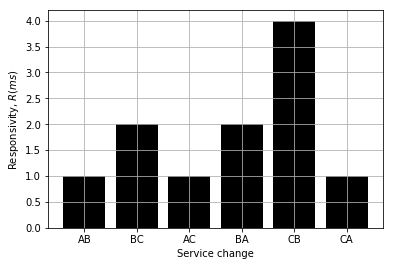

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')

x = ['AB', 'BC', 'AC', 'BA', 'CB', 'CA']
service_change = [1, 2, 1, 2, 4, 1]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, service_change, color='black')
plt.xlabel("Service change")
plt.ylabel("Responsivity, $R (ms)$")
l = [0, 1.0, 2.0, 3.0, 4.0]
lx = ['0.0', '1.0', '2.0', '3.0', '4.0']


#plt.yticks(['0.0', '1.0', '2.0', '3.0', '4.0'])

#plt.title("Energy output from various fuel sources")
plt.grid(True)
plt.xticks(x_pos, x);

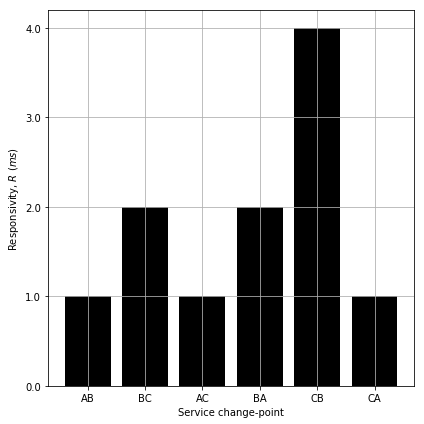

In [39]:
fig, axe = plt.subplots(figsize=(6,6))

x = ['AB', 'BC', 'AC', 'BA', 'CB', 'CA']
service_change = [1, 2, 1, 2, 4, 1]

x_pos = [i for i, _ in enumerate(x)]

axe.bar(x_pos, service_change, color='black')

l = [0, 1.0, 2.0, 3.0, 4.0]
lx = ['0.0', '1.0', '2.0', '3.0', '4.0']
axe.set_yticks(l)
axe.set_yticklabels(lx)
axe.set_xlabel("Service change-point")
axe.set_xticks(x_pos)
axe.set_xticklabels(x)

axe.set_ylabel("Responsivity, $R$ $(ms)$")
#axe.legend()
fig.tight_layout()
fig.savefig('service_change.pdf', format='pdf', dpi=1500);
axe.grid()

In [22]:
x_pos

[0, 1, 2, 3, 4, 5]

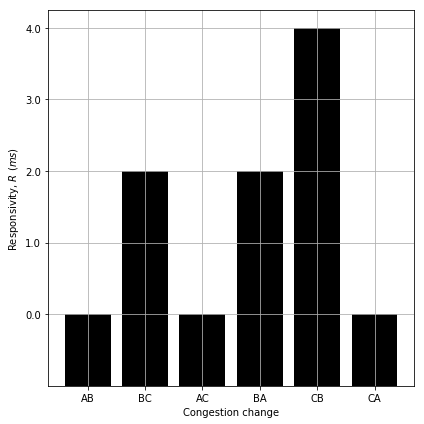

In [45]:
fig, axe = plt.subplots(figsize=(6,6))

x = ['AB', 'BC', 'AC', 'BA', 'CB', 'CA']
service_change = [1, 3, 1, 3, 5, 1]

x_pos = [i for i, _ in enumerate(x)]

axe.bar(x_pos, service_change, color='black')

l = [1.0, 2.0, 3.0, 4.0, 5.0]
lx = ['0.0', '1.0', '2.0', '3.0', '4.0']
axe.set_yticks(l)
axe.set_yticklabels(lx)
axe.set_xlabel("Congestion change")
axe.set_xticks(x_pos)
axe.set_xticklabels(x)

axe.set_ylabel("Responsivity, $R$ $(ms)$")
#axe.legend()
fig.tight_layout()
fig.savefig('service_change.pdf', format='pdf', dpi=1500);
axe.grid()

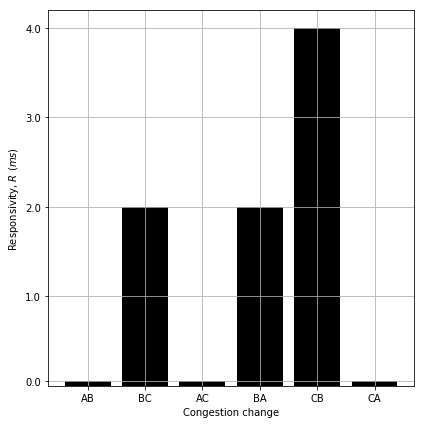

In [53]:
fig, axe = plt.subplots(figsize=(6,6))

x = ['AB', 'BC', 'AC', 'BA', 'CB', 'CA']
service_change = [0.05, 2, 0.05, 2, 4, 0.05]

x_pos = [i for i, _ in enumerate(x)]

axe.bar(x_pos, service_change, color='black')

l = [0.05, 1.0, 2.0, 3.0, 4.0]
lx = ['0.0', '1.0', '2.0', '3.0', '4.0']
axe.set_yticks(l)
axe.set_yticklabels(lx)
axe.set_xlabel("Congestion change")
axe.set_xticks(x_pos)
axe.set_xticklabels(x)

axe.set_ylabel("Responsivity, $R$ $(ms)$")
#axe.legend()
fig.tight_layout()
fig.savefig('service_change.pdf', format='pdf', dpi=1500);
axe.grid()